Analysis of the results computed in 'Learning rate gridsearch and training' notebook.  

Displays layer rotation curves and test accuracies for SGD and SGD+weight decay, when training with optimal learning rate

In [2]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

%load_ext autoreload

In [3]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history
from layer_rotation_utils import plot_layer_rotation_curves

In [4]:
with open('results_lr_gridsearch.p','rb') as f:
    results = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results_lr_gridsearch.p'

In [4]:
# test accuracies obtained with Layca's best configuration
ref_performances = {'C10-CNN1':0.8845,'C100-resnet':0.5981,'tiny-CNN':0.5089,'C10-CNN2':0.934,'C100-WRN':0.8069}

In [5]:
mpld3.disable_notebook()

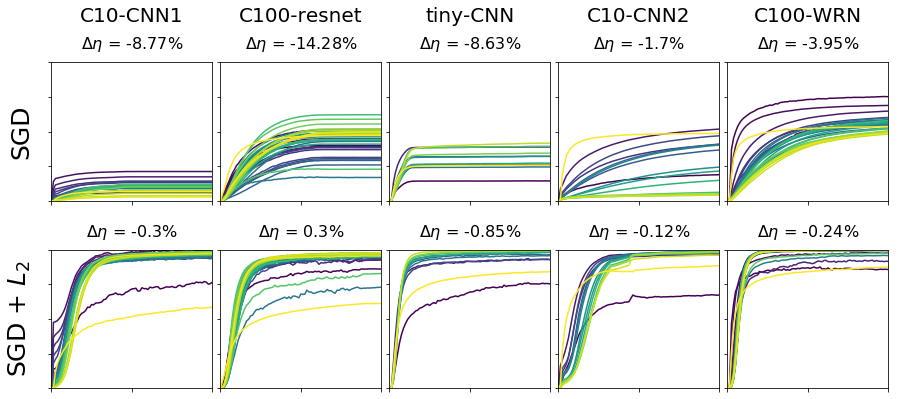

In [9]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
f, axes = plt.subplots(2,len(tasks), figsize = (3*len(tasks),6))
for i,task in enumerate(tasks):
    plot_layer_rotation_curves(results[task]['SGD']['ladc'], ax = axes[0,i])
    plot_layer_rotation_curves(results[task]['SGD_weight_decay']['ladc'], ax = axes[1,i])
    
    ref_performance = ref_performances[task]
    axes[0,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    axes[1,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD_weight_decay']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[0,i].set_xlabel('')
    axes[0,i].set_ylabel('')
    axes[0,i].set_xticklabels('')
    axes[0,i].set_yticklabels('')
    axes[0,i].set_xlim([0,80])
    axes[0,i].set_xticks([0,40,80]) 
    axes[1,i].set_xlim([0,80])
    axes[1,i].set_xticks([0,40,80])
    
    axes[1,i].set_ylabel('')
    axes[1,i].set_yticklabels('')
    axes[1,i].set_xlabel('')
    axes[1,i].set_xticklabels('')
        
axes[1,0].set_xticks([0,40,80]) 

pad = 3
axes[0,0].annotate('SGD', xy=(0, 0.5), xytext=(-axes[0,0].yaxis.labelpad - pad, 0),
            xycoords=axes[0,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)
pad = 3
axes[1,0].annotate('SGD + $L_2$', xy=(0, 0.5), xytext=(-axes[1,0].yaxis.labelpad - pad, 0),
            xycoords=axes[1,0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)

for j in range(5):
    pad = 40
    size = 20
    axes[0,j].annotate(tasks[j], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    
    
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/weightdecay_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")

In [8]:
# Training accuracies for each layer rotation curves visualization abov

tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
for wd in ['','_weight_decay']:
    performances = []
    for task in tasks:
        performances.append(round(results[task]['SGD'+wd]['history']['history']['acc'][-1],3))
    print(performances)

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


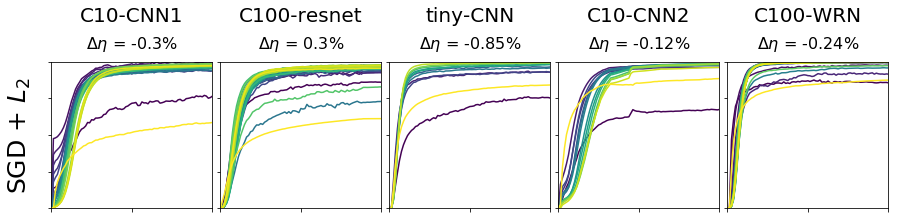

In [11]:
matplotlib.rcParams.update({'font.size': 15})
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
f, axes = plt.subplots(1,len(tasks), figsize = (3*len(tasks),2.7))
for i,task in enumerate(tasks):
    plot_layer_rotation_curves(results[task]['SGD_weight_decay']['ladc'], ax = axes[i])
    
    ref_performance = ref_performances[task]
    axes[i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD_weight_decay']['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels('')
    axes[i].set_yticklabels('')
    axes[i].set_xlim([0,80])
    axes[i].set_xticks([0,40,80]) 

pad = 3
axes[0].annotate('SGD + $L_2$', xy=(0, 0.5), xytext=(-axes[0].yaxis.labelpad - pad, 0),
            xycoords=axes[0].yaxis.label, textcoords='offset points',
            size=25, ha='right', va='center',rotation=90)

for j in range(5):
    pad = 40
    size = 20
    axes[j].annotate(tasks[j], xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')
    
    
plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/weightdecay_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")

In [12]:
# Training accuracies for each layer rotation curves visualization abov

tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2','C100-WRN']
performances = []
for task in tasks:
    performances.append(round(results[task]['SGD_weight_decay']['history']['history']['acc'][-1],3))
print(performances)

[1.0, 1.0, 1.0, 1.0, 1.0]
